In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
import os
import tarfile
import urllib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
DATA_URL = "https://raw.githubusercontent.com/ArchieJian/Diabetes-training/main/diabetes.csv"

In [2]:
Download =requests.get(DATA_URL).content

In [3]:
pd.set_option('display.max_columns', 200)

In [4]:
pd.set_option('display.max_rows', 200)

In [5]:
diabetes_data = pd.read_csv(DATA_URL)
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Замена всех нулевых значений на медианные, для всех столбцов кроме результата и кол-ва беременностей
empty_cols = [column for column in diabetes_data.columns if column not in ['Outcome', 'Pregnancies']]
imputer = SimpleImputer(missing_values=0, strategy='median')
transformer = ColumnTransformer(
    [('impute', imputer, empty_cols)],
    remainder='passthrough',    #Остальные столбцы не трогаем
    verbose_feature_names_out=False)    #Не добавляем префикс к названиям столбцов   
transformer.set_output(transform="pandas")  #Выводим в таблицу, а не в массив

data = transformer.fit_transform(diabetes_data)
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1,1


### За исключением BMI и DiabetesPedigreeFunction, все столбцы являются целочисленными. Результатом является метка, содержащая значения 1 и 0. 1 означает, что у человека диабет, а 0 означает, что у человека нет диабета.

In [7]:
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1


In [8]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,3.845052,0.348958
std,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Pregnancies               768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [10]:
print("diabetes data set dimensions : {}".format(data.shape))

diabetes data set dimensions : (768, 9)


In [11]:
data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [12]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,3.845052,0.348958
std,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


In [13]:
# Import dataset
data
# Get familier with dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Pregnancies               768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [14]:
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


# Исследовательский анализ данных
#### На этом этапе я продемонстрировал аналитику с использованием графического интерфейса с помощью Seaborn.

### Корреляция

#### Корреляция – это одна или несколько переменных, связанных друг с другом. Это также помогает определить важность функции и очистить набор данных перед началом моделирования.

<AxesSubplot: >

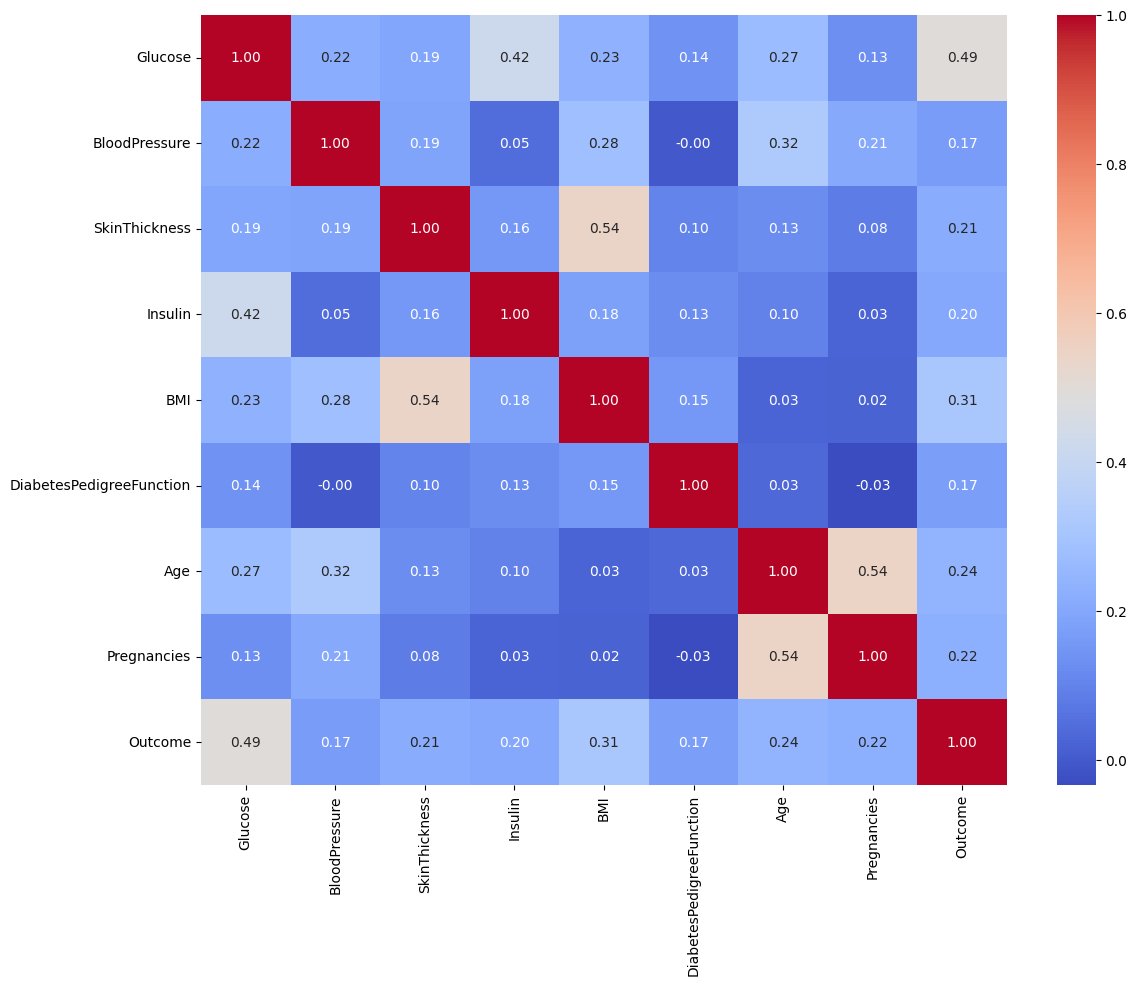

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

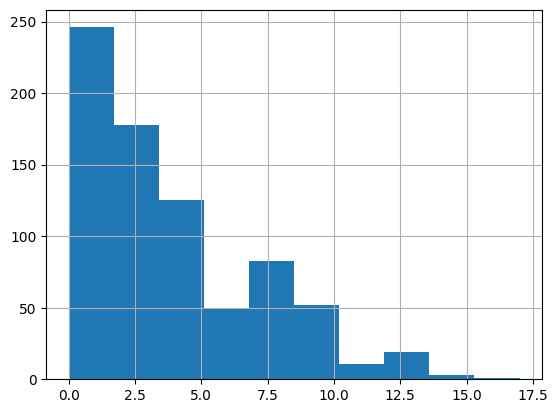

In [16]:
data['Pregnancies'].hist();

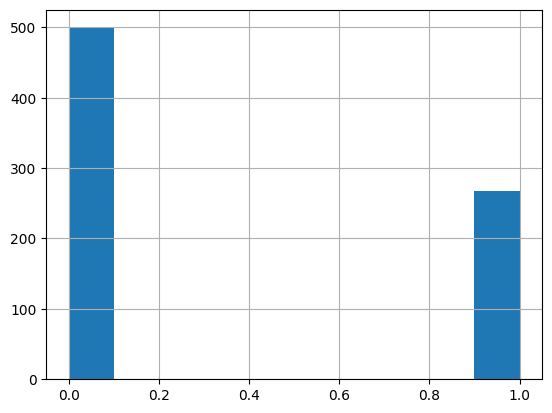

In [17]:
data['Outcome'].hist();

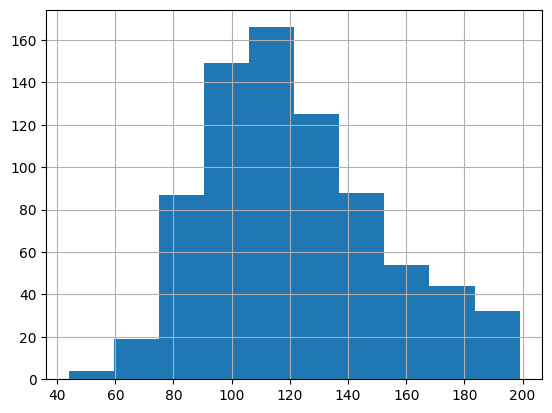

In [18]:
data['Glucose'].hist();

### Pregnancies

#### Женщины с диабетом могут иметь и имеют здоровую беременность и здоровых детей. Лечение диабета может помочь снизить риск осложнений. Невылеченный диабет увеличивает риск осложнений беременности, таких как высокое кровяное давление, депрессия, преждевременные роды, врожденные дефекты и невынашивание беременности.

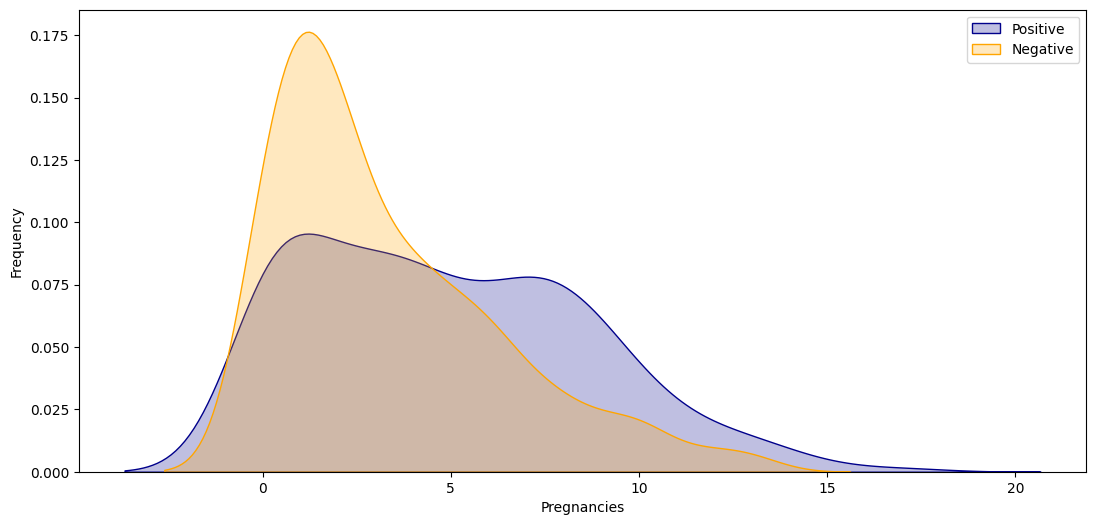

In [19]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], 
     color="DarkBlue", fill = True)
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], 
     ax =g, color="Orange", fill= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

### Outcome

#### Результат имеет значения 1 и 0, где 1 означает, что у человека диабет, а 0 означает, что у человека нет диабета. Это мой столбец меток в наборе данных.

<AxesSubplot: xlabel='Outcome', ylabel='count'>

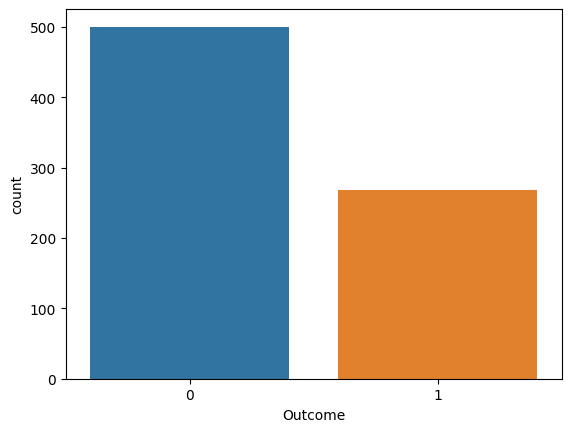

In [20]:
sns.countplot(data,x='Outcome')

#### Этот график показывает, что в наборе данных больше людей, у которых нет диабета, что составляет около 65%, а у 35% есть диабет.

## Glucose
#### Здесь мы пытаемся увидеть, как диабет зависит от уровня глюкозы.

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

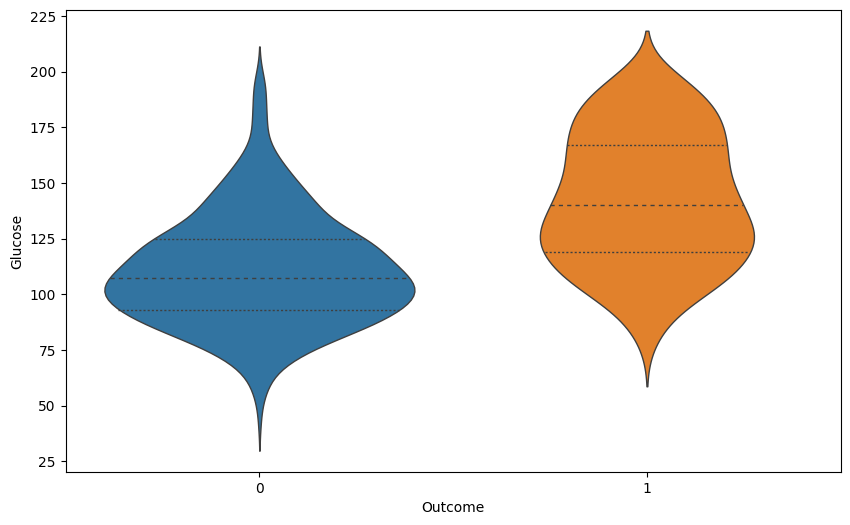

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(data, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

#### здесь мы видим, что вероятность диабета постепенно увеличивается с уровнем глюкозы.

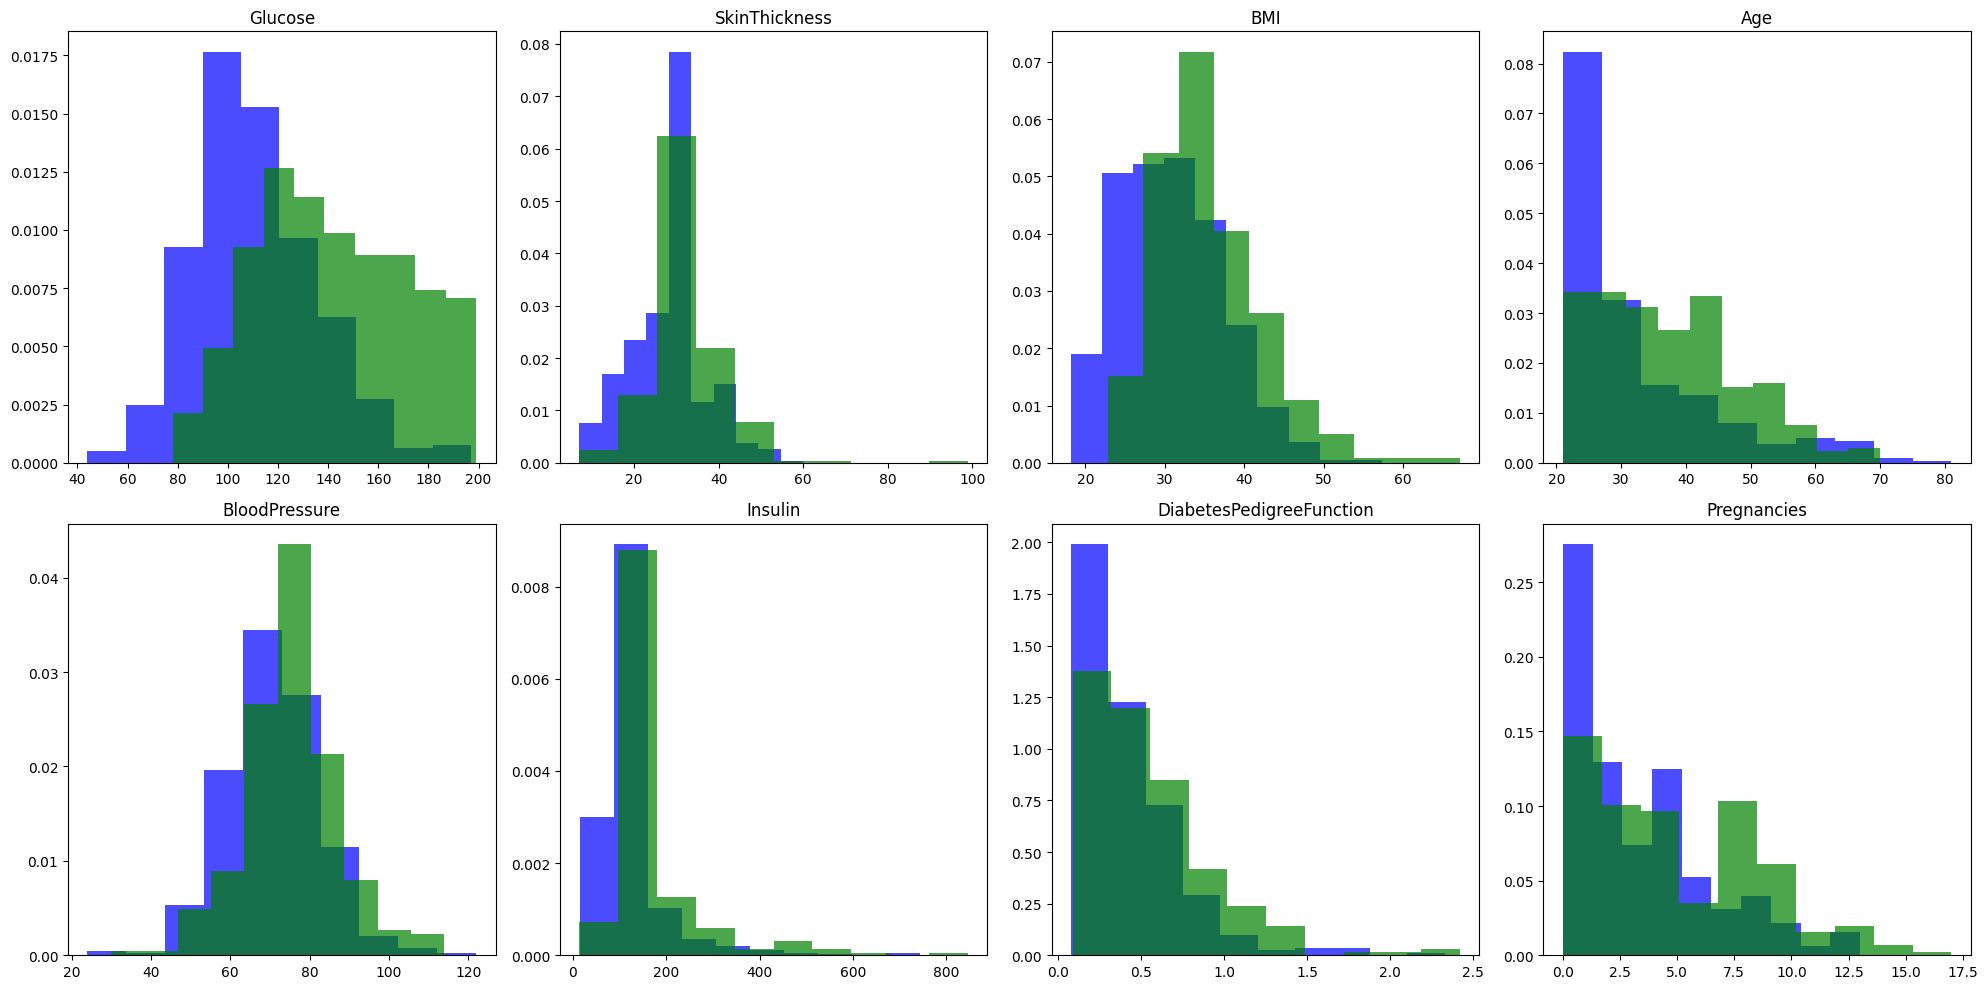

In [22]:
%matplotlib inline
fig, axs = plt.subplots(2, 4, figsize=(20,10))
for i in range(8):
    x = i % 2
    y = i // 2
    series_healthy = data[data["Outcome"] == 0][data.columns[i]]
    series_diabet = data[data["Outcome"] == 1][data.columns[i]]
    
    axs[x, y].hist(series_healthy, color = 'blue', alpha = 0.7, density = True, stacked = True)
    axs[x, y].hist(series_diabet, color = 'green', alpha = 0.7, density = True, stacked = True)
    axs[x, y].set_title(data.columns[i])
fig.tight_layout()
plt.show()

# На основании этих графиков можно сделать следующие выводы:
 - в среднем люди беременности увеличивают риск развития диабета
 - в среднем давление у людей с диабетом несколько выше, чем у людей без диабета
 - в среднем инсулин больше у людей, болеющих диабетом
 - в среднем большой ИМТ свойственен людям, больным диабетом
 - диабетики в среднем живут меньше здоровых людей

## Для определения наиболее важных параметров построим матрицу корреляции.

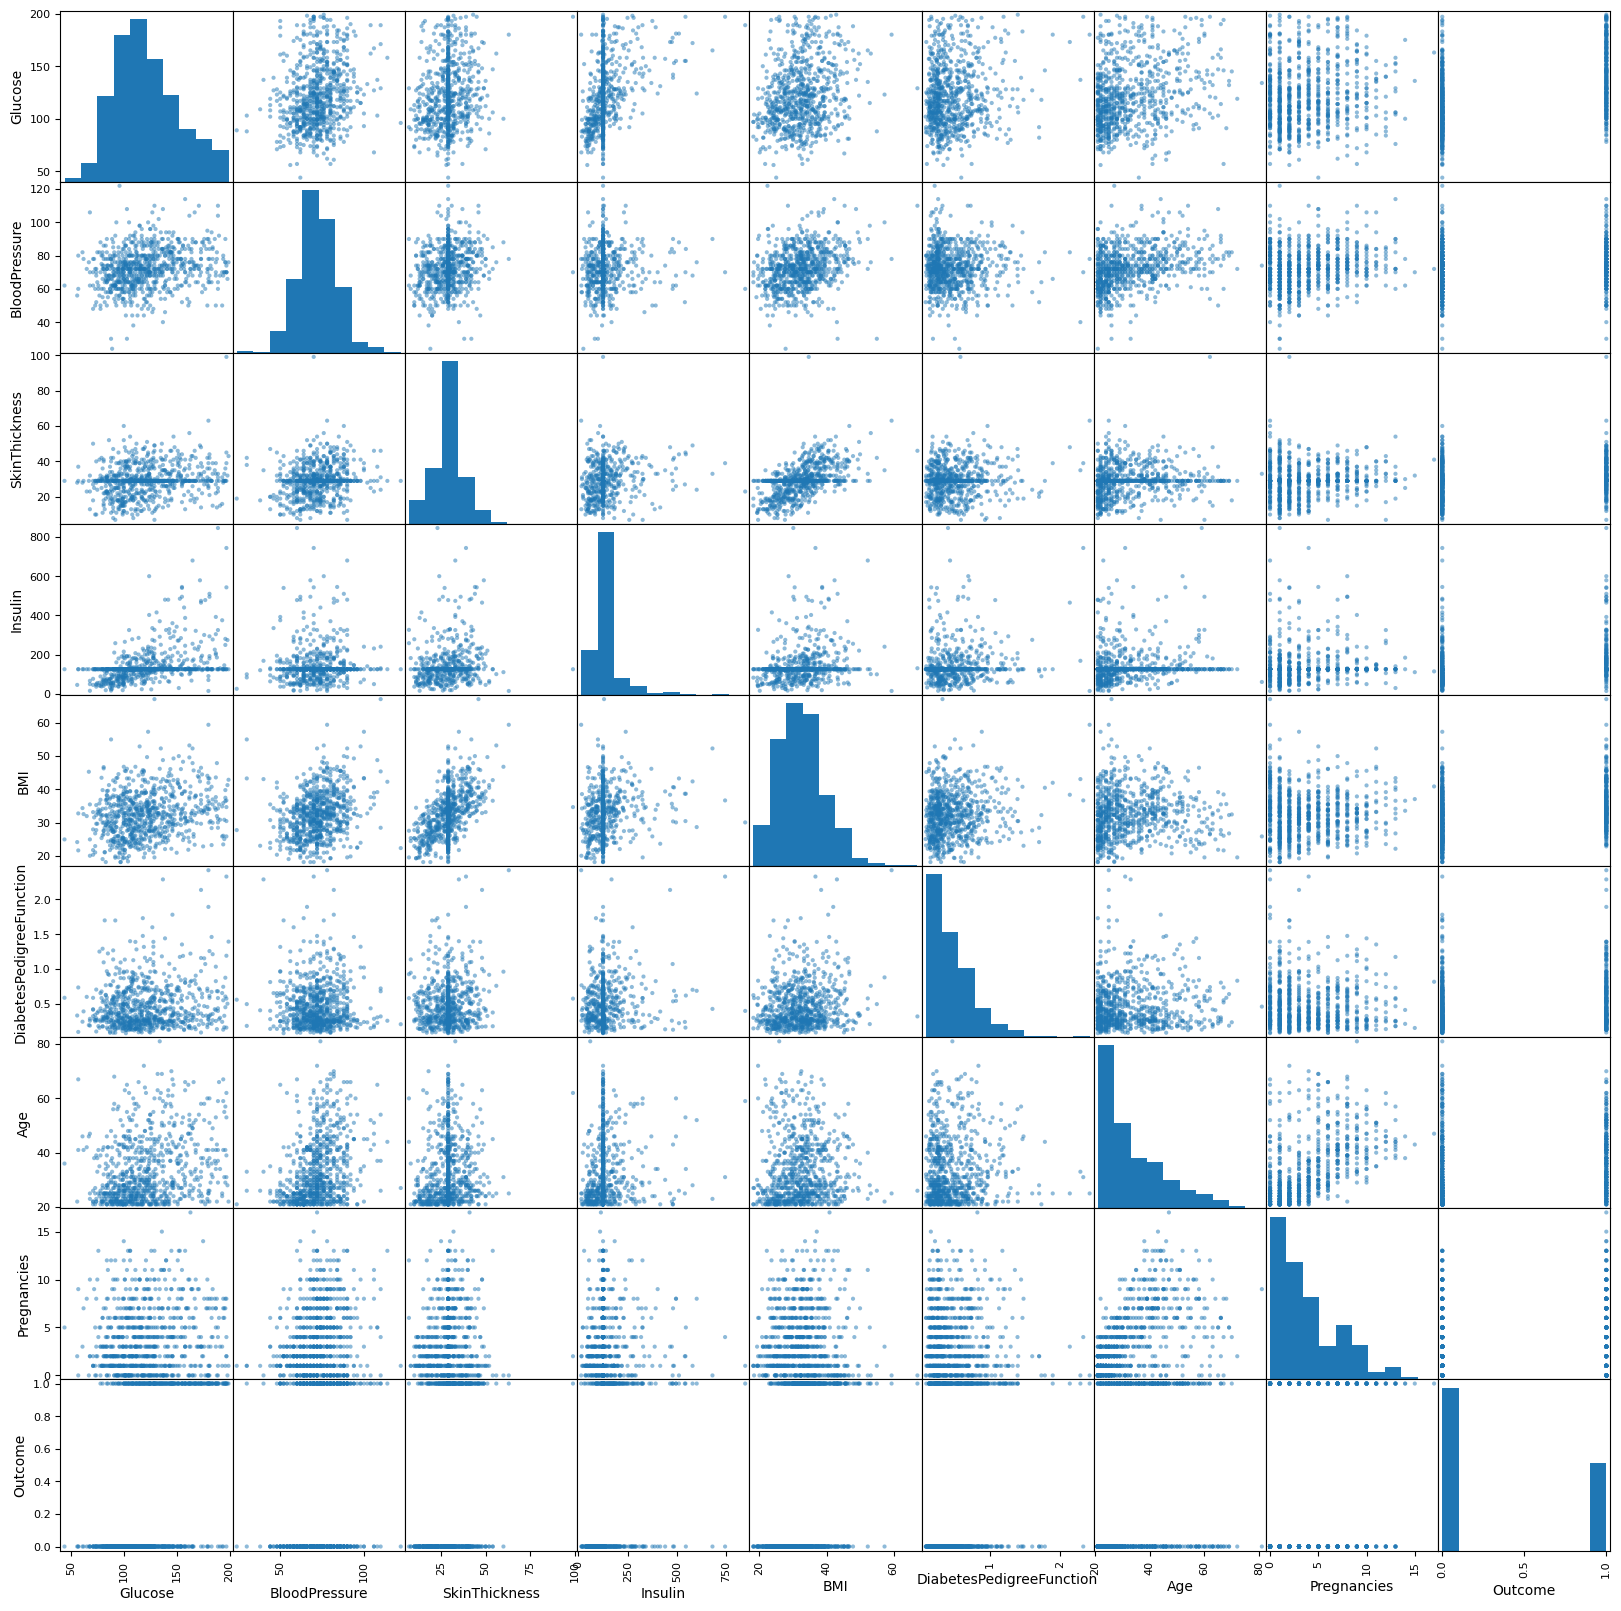

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20))
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


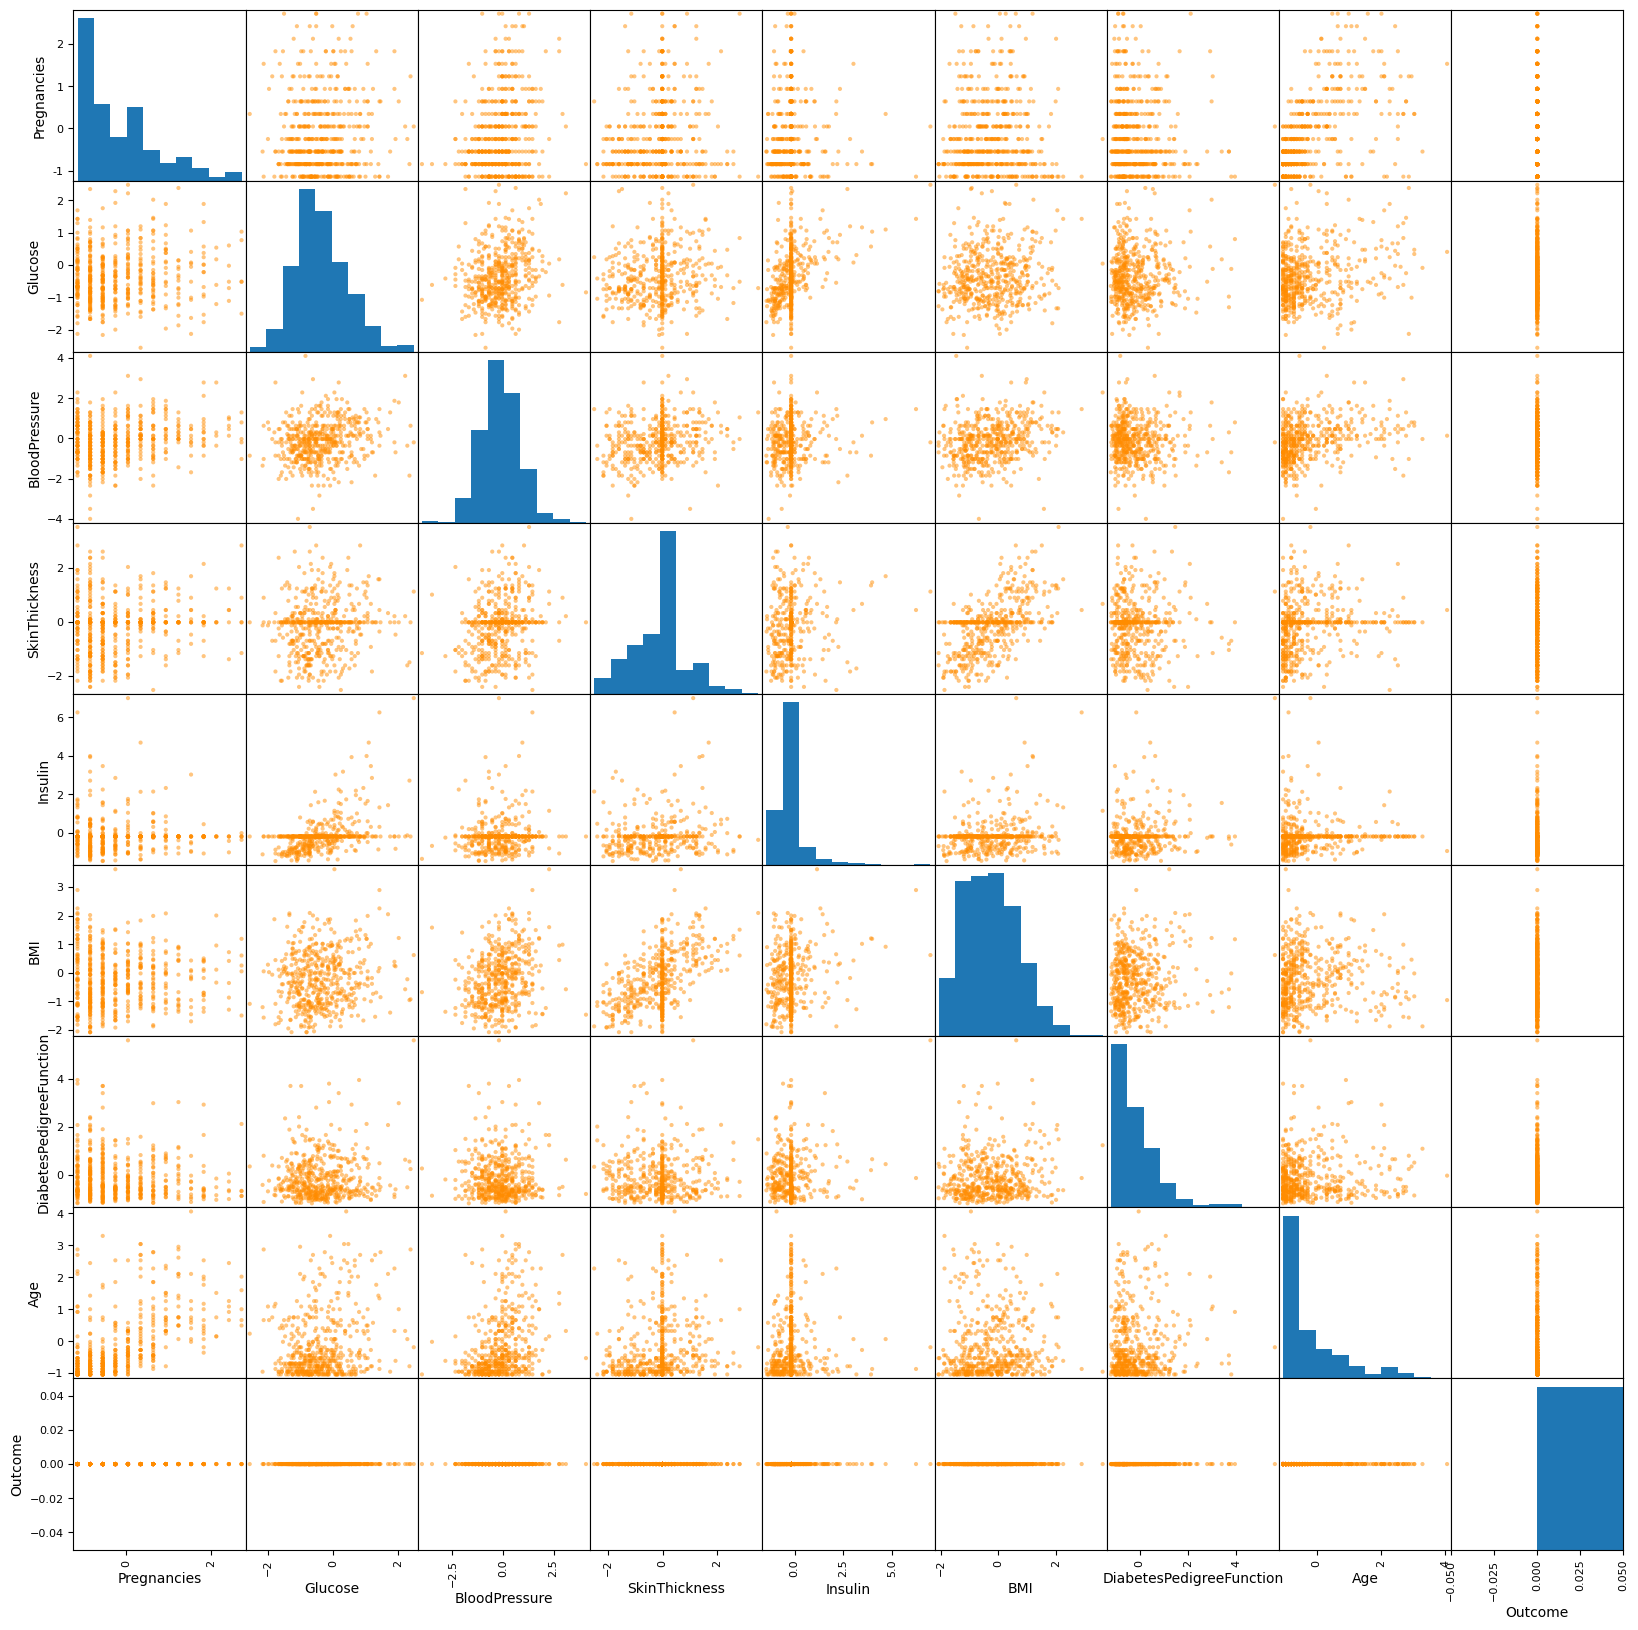

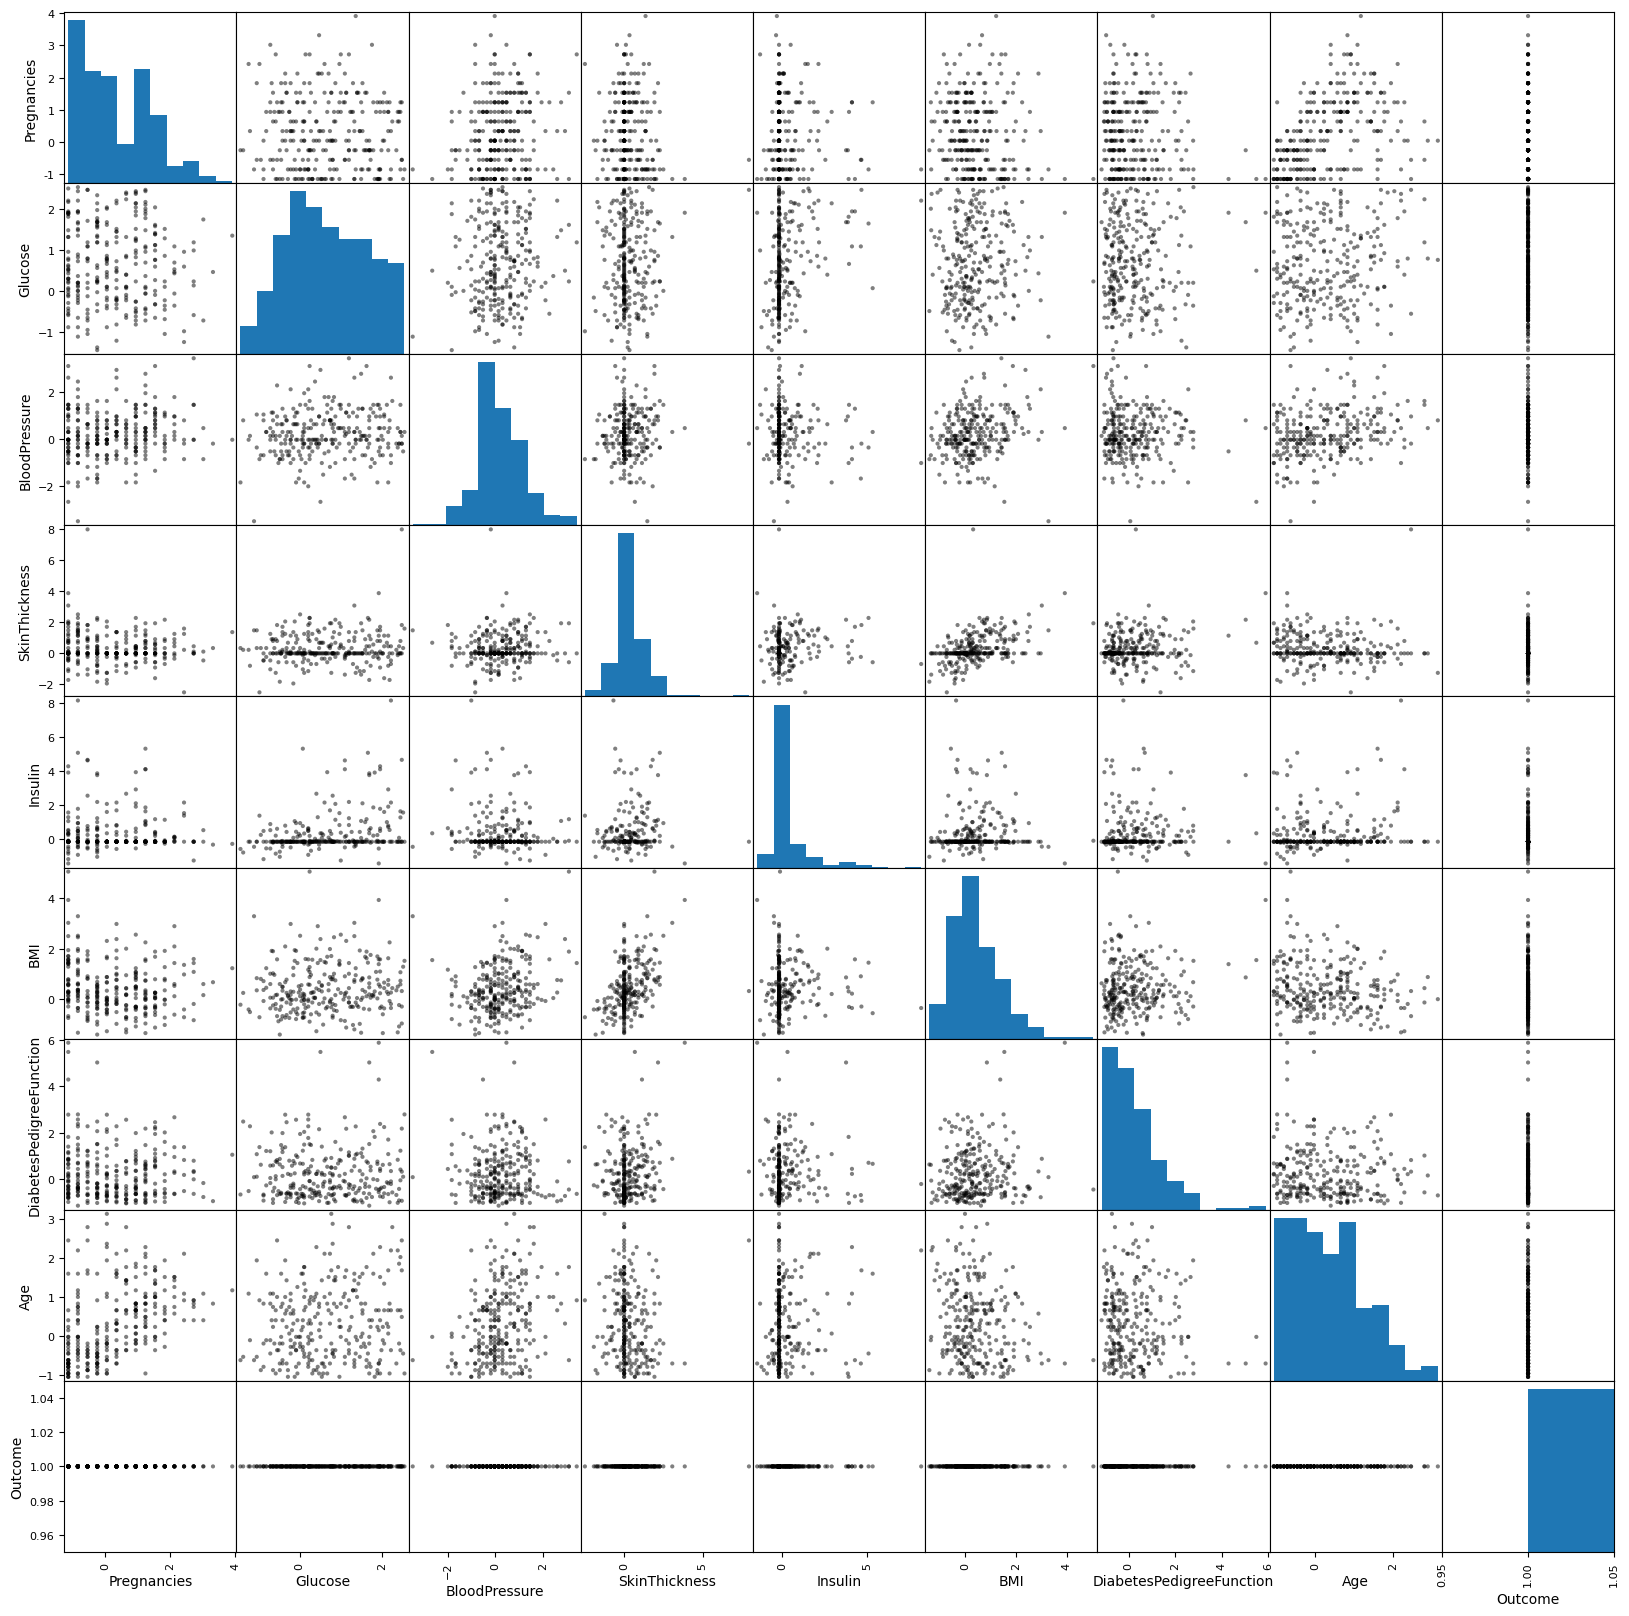

In [ ]:
non_id_cols = [column for column in diabetes_data.columns if column != 'Outcome']

scaler = StandardScaler()
transformer = ColumnTransformer(
    [('scale', scaler, non_id_cols)],
    remainder='passthrough',    #Остальные столбцы не трогаем
    verbose_feature_names_out=False)    #Не добавляем префикс к названиям столбцов   
transformer.set_output(transform='pandas')  #Выводим в таблицу, а не в массив

ready_data = transformer.fit_transform(data)

scatter_matrix(ready_data[ready_data["Outcome"] == 0],figsize=(20,20),color='DarkOrange')
scatter_matrix(ready_data[ready_data["Outcome"] == 1],figsize=(20,20),color='Black')

plt.show()

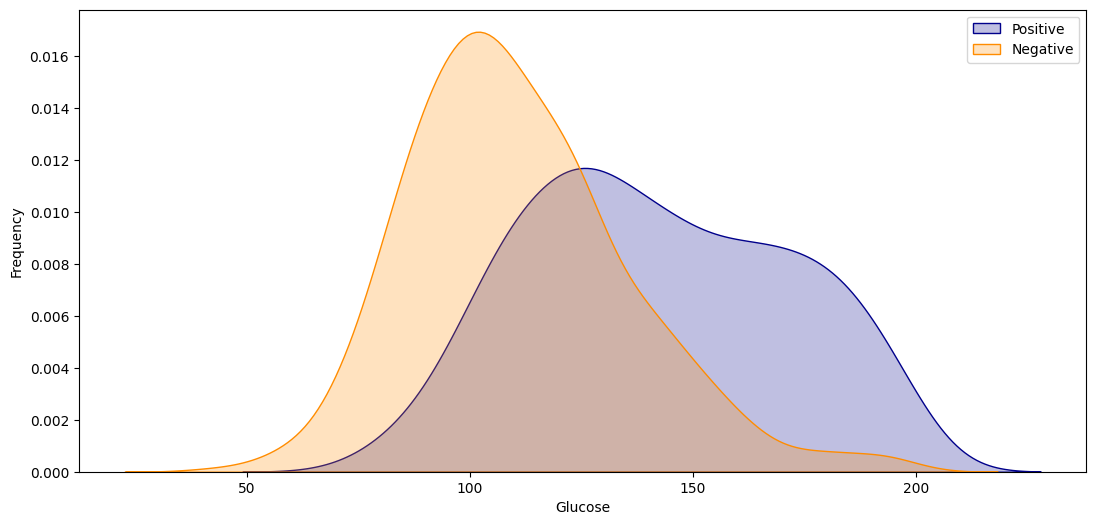

In [ ]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color="DarkBlue", fill = True)
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax =g, color="DarkOrange", fill= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

# Glucose vs BMI vs Age

<AxesSubplot: xlabel='Glucose', ylabel='BMI'>

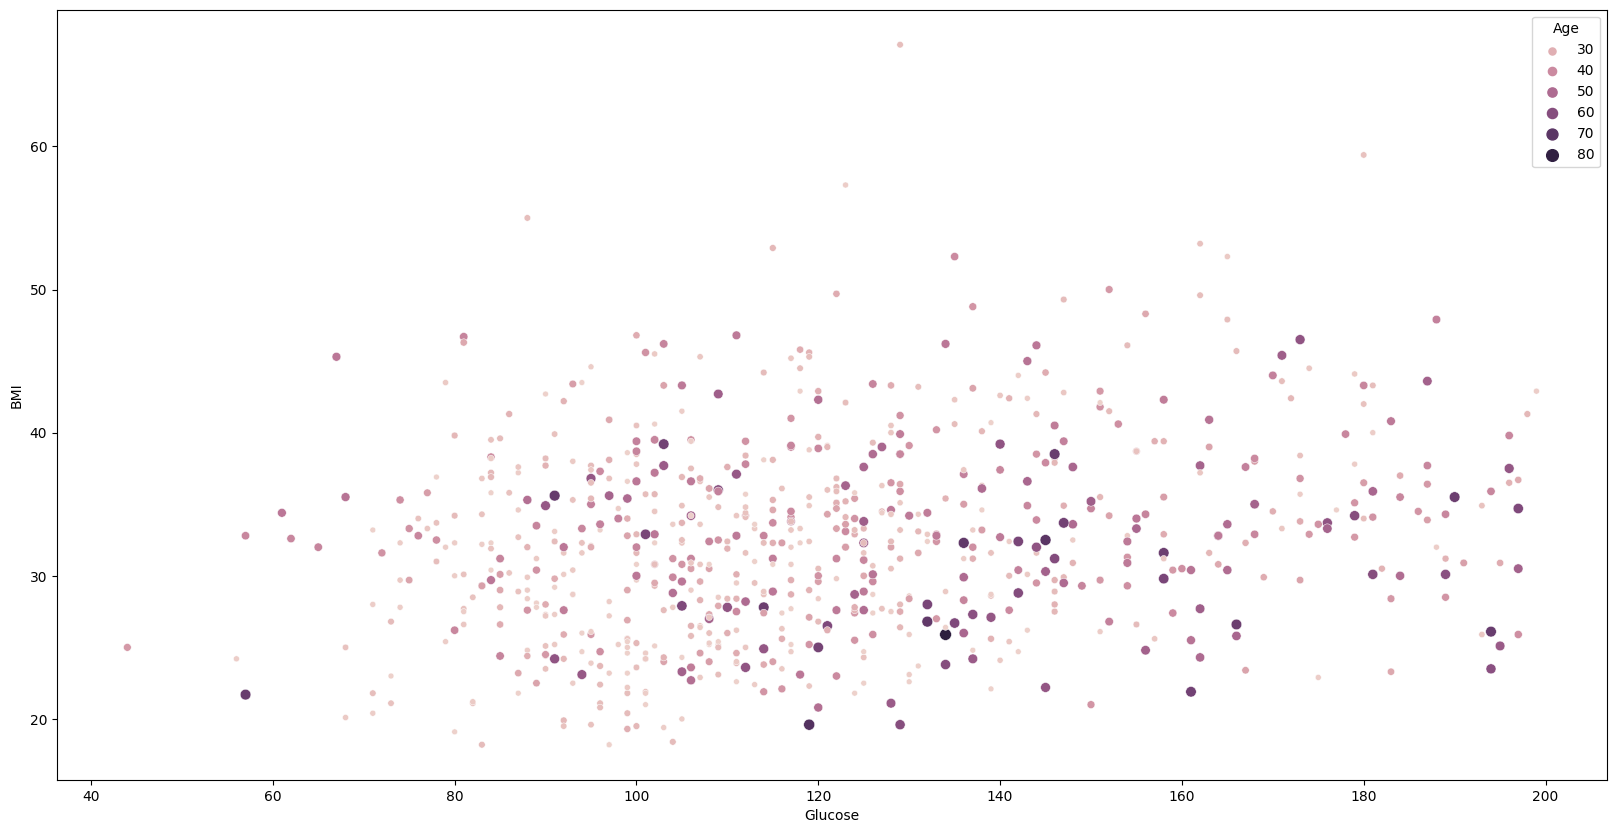

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data, x="Glucose", y="BMI", hue="Age", size="Age")

In [ ]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['Outcome']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[353 711 373  46 682 360 414 339 694  33 218 705  76 616 675 613 666  34
 182 405 464 576 664   9 466 267 167 320 610 485 295 204 195 269 434 217
 323  85  26 171 716  96 561 296  60 175 737 601 294 209 730 764 751 216
 386 467 696 652 224 676 416 669 148 404 206 709  61 132  43 228  40 604
 695 752 375 214  69  14 306 312 334 442 658 105 551 299 286 106 744 282
 619 363 316 141 463 657 718 691 544 321 358 117 651 336 118 603 473  51
 729 623 671 234 465 100 134 569 103 459 340 504  21 625 454 152 594 614
  68  74  47  22  95 536 583  18 600 757 648 281 598 397 184 627 126 636
  56 472 512 758 289 249  28  59 539  58  31 367  37 201 706 597 272 617
 555 120 692  57 497 147 521 369 357 352 524 229 707 338 266 547 343 565
 681 588 470 653 487 519 680 655 632  50 552 197   2 230 633 571  98 631
 455 128 248 548 586 203 738 372 443 194 333 762 582 500  97 226 200 331
 301 581 592 748  10 690 540 398 285 391 259 684 287 714 176 160 761 644
 605 315 297 444 284 241 413 318  55 210  66 423 43

In [ ]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Glucose",axis=1,inplace=True)

In [ ]:
data = strat_train_set.copy()

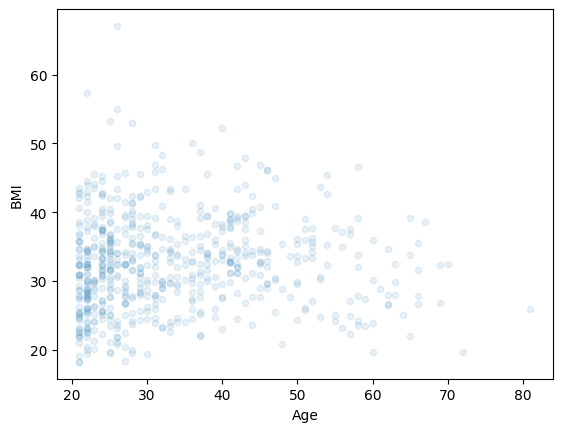

In [ ]:
data.plot(kind='scatter',x='Age',y = 'BMI',alpha = 0.1);

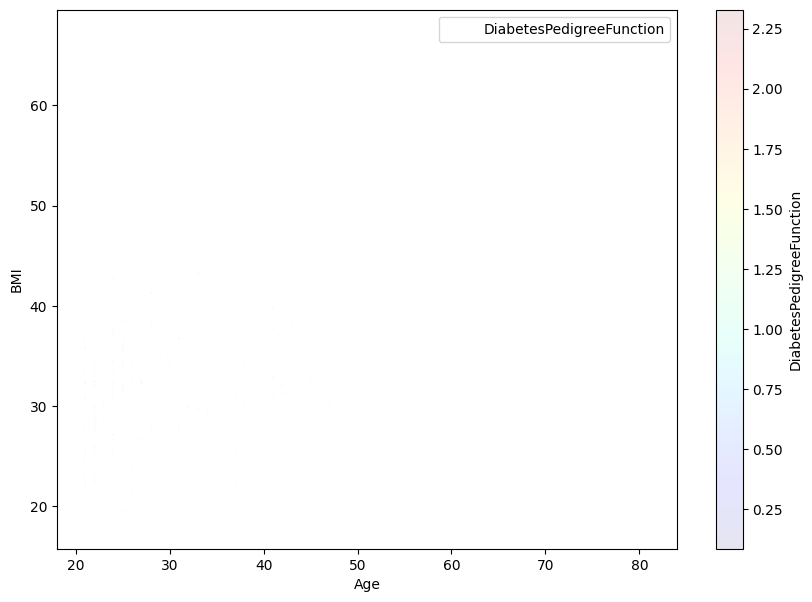

In [ ]:
data.plot(kind='scatter',x='Age',y = 'BMI',alpha = 0.1,s=data['DiabetesPedigreeFunction']/100,label='DiabetesPedigreeFunction',figsize=(10,7),c='DiabetesPedigreeFunction',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()